In [1]:
import numpy as np

attribute_names = ["Age", "Income", "Student", "Credit_Rating", "Buys_Computer"]

data = np.array([
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31-40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31-40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31-40", "medium", "no", "excellent", "yes"],
    ["31-40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
])

def entropy(data, column):
    unique_values, counts = np.unique(data[:, column], return_counts=True)
    probabilities = counts / len(data)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

entropies = {}
for column in range(data.shape[1] - 1):
    entropies[attribute_names[column]] = entropy(data, column)

first_feature = max(entropies.items(), key=lambda item: item[1])[0]

print("Entropy of each attribute / feature:")
for attribute, entropy_val in entropies.items():
    print(f"{attribute}: {entropy_val:.3f}")

print("First feature to be selected for constructing the decision tree:")
print(f"{first_feature}: {entropies[first_feature]:.3f}")

Entropy of each attribute / feature:
Age: 1.577
Income: 1.557
Student: 1.000
Credit_Rating: 0.985
First feature to be selected for constructing the decision tree:
Age: 1.577


In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

tree_depth = pipeline.named_steps["classifier"].get_depth()

print(f"Tree depth: {tree_depth}")

Tree depth: 4


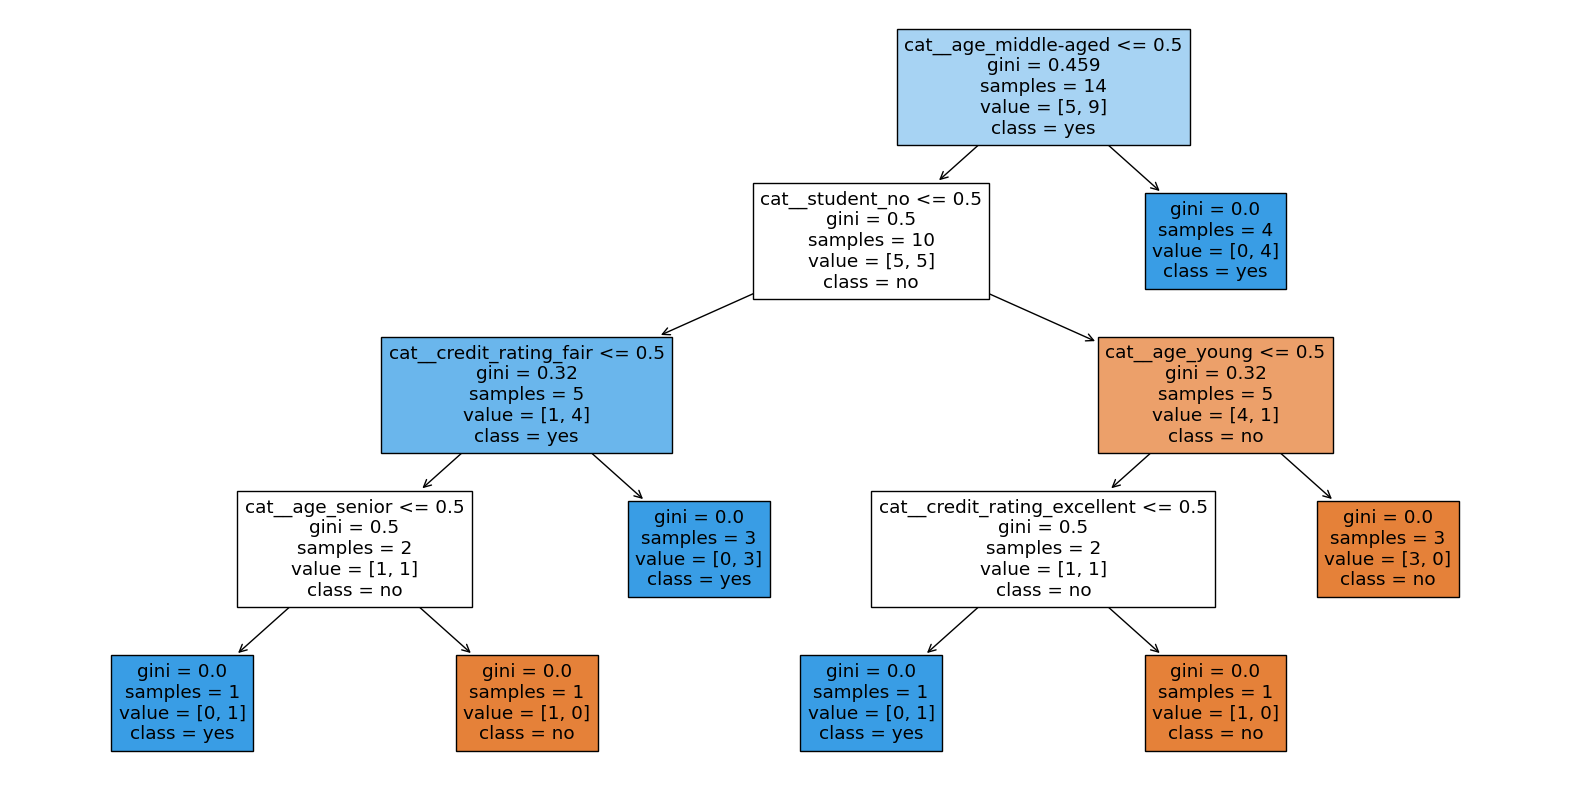

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

feature_names = list(pipeline.named_steps["preprocessor"].get_feature_names_out(input_features=categorical_features)) + list(X.columns.drop(categorical_features))

plt.figure(figsize=(20, 10))
plot_tree(pipeline.named_steps["classifier"], filled=True, feature_names=feature_names, class_names=['no', 'yes'])
plt.show()

In [4]:
import pandas as pd
import numpy as np


df = pd.read_csv("code_only.csv")

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-0.560180,0.397133,-0.067608,-1.361568,-1.189112,0.362005,-2.113351,-0.945830,0.967215,-1.035563,...,-1.982848,-2.182985,-1.788343,-1.500597,0.575761,-1.418272,1.969096,-1.663663,0.929276,10.0
1,-0.617345,0.004933,0.107997,-1.275459,-1.116872,0.391739,-2.048924,-1.050489,0.850765,-1.035608,...,-1.709290,-2.184924,-1.784352,-1.194703,0.194767,-1.383189,2.073854,-1.415486,0.632933,8.0
2,-0.597761,0.410195,-0.095720,-1.338432,-1.206770,0.355120,-2.098167,-0.965952,0.973628,-1.008978,...,-2.004396,-2.188181,-1.790508,-1.496068,0.613387,-1.429072,1.965157,-1.676064,0.918330,7.0
3,-0.546645,0.208720,-0.045373,-1.222537,-1.078728,0.421885,-2.104985,-1.122851,0.968126,-0.895802,...,-1.837438,-2.176035,-1.723567,-1.477411,0.382508,-1.410528,1.997823,-1.583785,0.787734,5.0
4,-0.643125,0.430050,-0.008826,-1.351897,-1.171904,0.367173,-2.125630,-0.877730,0.865652,-1.048714,...,-1.947140,-2.250539,-1.726540,-1.531785,0.549569,-1.434322,2.015190,-1.620357,1.025025,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,-1.765830,-2.682315,-1.481811,1.248640,-0.725905,1.540399,-0.321199,-0.397931,-0.888173,0.497768,...,-0.909174,0.503568,-0.641167,-1.294205,-2.402035,-1.718075,-0.915480,-2.096138,0.412238,1.0
1172,-1.898498,-1.897484,-1.761415,0.662543,-0.868898,1.392034,-0.985371,-0.187743,-0.496623,0.845496,...,-1.382139,0.097382,-1.010758,-1.461787,-1.710525,-1.110383,-0.824634,-1.276787,0.273552,8.0
1173,-1.931803,-4.522925,0.445944,0.603920,1.469562,-4.925057,-0.936538,-0.120320,0.228790,-2.796853,...,0.972262,-0.030479,0.135137,1.463492,-1.170290,0.936117,-1.204324,1.097006,-0.862900,2.0
1174,-1.669846,-2.186171,-2.102323,0.619586,-0.960931,1.629884,-0.794663,-0.106962,-0.479505,0.925149,...,-1.258445,0.197480,-0.972337,-1.168023,-1.738411,-1.155843,-0.791999,-1.303357,0.551702,8.0


In [6]:
df=df.replace(6.5,6)
df[df['score']== 6.5]

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score


In [7]:
df=df.replace(88,8)
df[df['score']== 88]

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score


In [8]:
# class = lambda df['score']: 0 if df['score'] <= 5 else 1
df["class"]=df['score'].apply(lambda x: 0 if x <= 5 else 1)

# Assuming you have 'n' classes and each class is stored in a list
class1_vectors = df[df['class']== 0]
class2_vectors = df[df['class']== 1]

class1_vectors.drop(['score', 'class'], axis=1, inplace=True)
class2_vectors.drop(['score', 'class'], axis=1, inplace=True)

C:\Users\geethika\AppData\Local\Temp\ipykernel_22660\2247395021.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class1_vectors.drop(['score', 'class'], axis=1, inplace=True)
C:\Users\geethika\AppData\Local\Temp\ipykernel_22660\2247395021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class2_vectors.drop(['score', 'class'], axis=1, inplace=True)


In [9]:
#dividing dataset into two datas 
X = df.iloc[:, 0:767]
y = df['class']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Splitting the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and train a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

#Evaluate the accuracy on both training and test data
train_accuracy = accuracy_score(y_train, tree_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, tree_classifier.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.99
Test Accuracy: 0.71


Training Set Accuracy: 0.99
Test Set Accuracy: 0.68


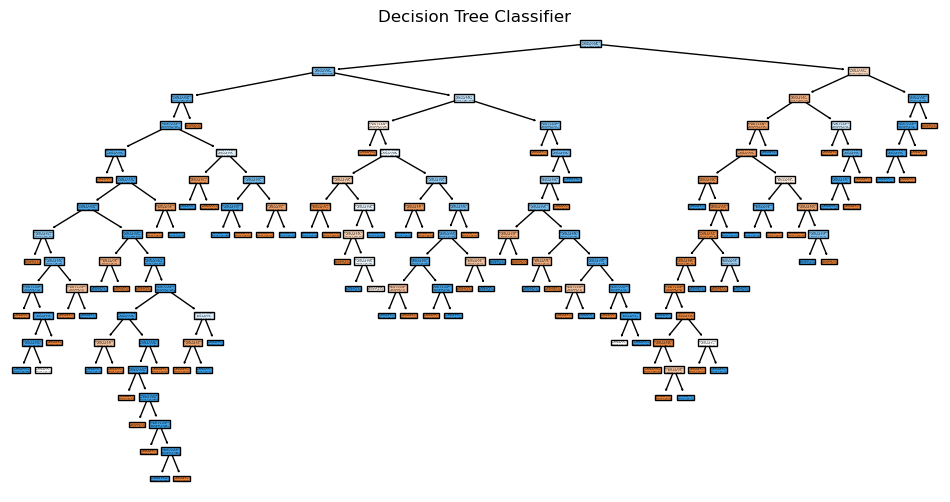

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree


# Splitting the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Decision Tree classifier
model = DecisionTreeClassifier()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the training and test data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculating accuracy for training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# Plotting the Decision Tree
plt.figure(figsize=(12, 6))
tree.plot_tree(model, filled=True, feature_names=None, class_names=None)
plt.title("Decision Tree Classifier")
plt.show()


Training Set Accuracy (max_depth=5): 0.86
Test Set Accuracy (max_depth=5): 0.68


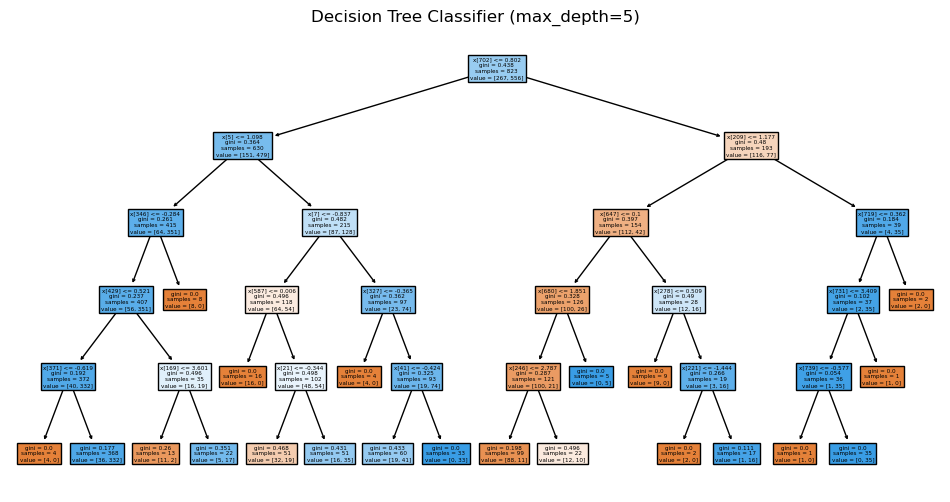

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree


# Imposing max_depth constraint on the Decision Tree
max_depth = 5  
model = DecisionTreeClassifier(max_depth=max_depth)

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the training and test data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculating accuracy for training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Set Accuracy (max_depth={max_depth}): {train_accuracy:.2f}")
print(f"Test Set Accuracy (max_depth={max_depth}): {test_accuracy:.2f}")

# Plotting the Decision Tree with max_depth constraint
plt.figure(figsize=(12, 6))
tree.plot_tree(model, filled=True, feature_names=None, class_names=None)
plt.title(f"Decision Tree Classifier (max_depth={max_depth})")
plt.show()


Training Set Accuracy (Criterion: entropy): 0.99
Test Set Accuracy (Criterion: entropy): 0.69


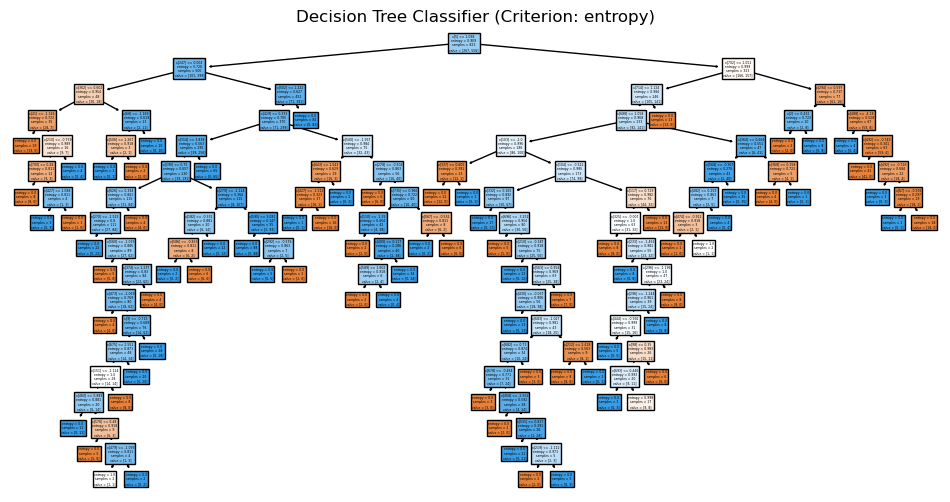

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree


# Default criterion is "Gini" we changed it to "Entropy"
criterion = "entropy"
model = DecisionTreeClassifier(criterion=criterion)

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the training and test data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculating accuracy for training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Set Accuracy (Criterion: {criterion}): {train_accuracy:.2f}")
print(f"Test Set Accuracy (Criterion: {criterion}): {test_accuracy:.2f}")

# Plotting the Decision Tree with "Entropy" criterion
plt.figure(figsize=(12, 6))
tree.plot_tree(model, filled=True, feature_names=None, class_names=None)
plt.title(f"Decision Tree Classifier (Criterion: {criterion})")
plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Creating a single Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Creating a Random Forest classifier with 100 trees 
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Making predictions using both classifiers
decision_tree_predictions = decision_tree.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)

# Evaluating the performance of both classifiers
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

print(f"Decision Tree Accuracy: {decision_tree_accuracy:.2f}")
print(f"Random Forest Accuracy: {random_forest_accuracy:.2f}")

# Print classification reports for both classifiers
print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, random_forest_predictions))


Decision Tree Accuracy: 0.68
Random Forest Accuracy: 0.73
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       118
           1       0.76      0.74      0.75       235

    accuracy                           0.68       353
   macro avg       0.64      0.64      0.64       353
weighted avg       0.68      0.68      0.68       353

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       118
           1       0.77      0.84      0.80       235

    accuracy                           0.73       353
   macro avg       0.69      0.67      0.68       353
weighted avg       0.72      0.73      0.72       353

